# Приклад до лабораторної роботи № 11.1

## (розподіл Гаусса)

### Імпорт необхідних модулів

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Документація та ін.:

http://www.numpy.org

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html

https://realpython.com/python-matplotlib-guide/

https://docs.scipy.org/doc/scipy/reference/stats.html

### Задаємо обсяг вибірки, параметри розподілу і генеруємо послідовність псевдовипадкових чисел

In [2]:
n = 1000  #обсяг вибірки

mean = 0  #математичне сподівання
stdev = 5 #середнє квадратичне відхилення

var = stdev**2 #обчислюємо дисперсію

X = np.random.normal(mean, stdev, n) #генеруємо n псевдовипадкових чисел з нормальним розподілом


skew, kurt = norm.stats(mean, stdev, moments='sk') #обчислення теоретичних коефіцієнтів асиметрії та ексцесу

'''
Останній рядок не дуже потрібний тут оскільки всім відомо:), що ці коефіцієнти дорівнюють нулю для нормального розподілу,
але подібне можна буде використати для інших розподілів, наприклад, якщо розглядати бета-розподіл, який задано його
коефіцієнтами a і b, то теоретичні математичне сподівання, дисперсію, коефіцієнти асиметрії та ексцесу 
можна знайти наступним чином:

mean, var, skew, kurt = beta.stats(a, b, moments='mvsk') 

перед використанням функції beta.stats() не забудьте  на початку зробити from scipy.stats import beta
'''

np.set_printoptions(precision=4, linewidth=120)
X[0:20] #скільки елементів згенерованого масиву надрукувати


array([-0.4834,  0.7821,  3.343 ,  3.7632,  7.3199, -5.2214,  5.2512,  1.4899, -2.0591,  4.0499, -5.0164,  9.4286,
        4.4999, -7.169 , -4.1161, -1.5692, -3.441 , -3.3956,  9.1589, -0.4251])

### Представимо це графічно

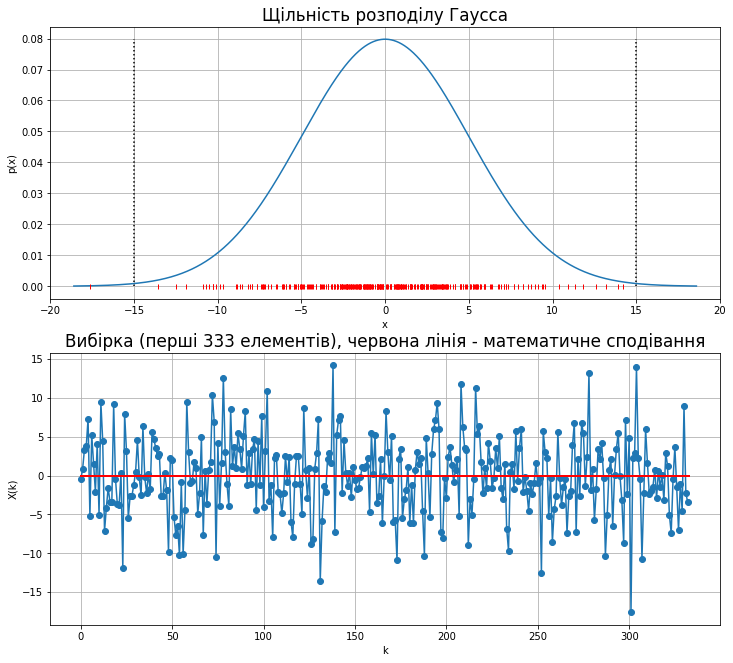

In [3]:
# графік щільності розподілу
t= np.arange(norm.ppf(0.0001, mean, stdev), norm.ppf(0.9999, mean, stdev), 0.001) 
s = norm.pdf(t, mean, stdev)

fig, ax = plt.subplots(2,1) #буде два графіки один під одним
fig.set_size_inches(12, 11) #розмір того всього в дюймах
ax[0].plot(t, s) #вивід щільності розподілу на першому графіку


ax[0].vlines([mean - 3*stdev, mean + 3*stdev],0,max(s),linestyles=':') # ілюстрація діапазону +- 3сігма 

plt.rcParams.update({'font.size': 14}) # розмір шрифта

ax[0].set_xlim(-20, 20)
ax[0].set(xlabel='x', ylabel='p(x)',   #позначення осей
       title='Щільність розподілу Гаусса') #заголовок
ax[0].grid()  #сітка


N = round(n/3) 
ax[0].plot(X[0:N], np.zeros(N), 'r|', markersize=5)  #червоні рисочки

#ax[1].set_ylim(-25, 25)
ax[1].plot(X[0:N], marker = 'o')   
ax[1].grid()
ax[1].plot([0, N],[mean, mean], color='r', linestyle='-', linewidth=2)

# на другому графіку візуалізуємо власне згенеровану вибірку, але не всі n елементів
ax[1].set(xlabel='k', ylabel='X(k)', title='Вибірка (перші '+str(N)+' елементів), червона лінія - математичне сподівання')


plt.show()

### Обчислюємо реалізації оцінок

In [4]:
sm = np.sum(X)/n                          #оцінка математичного сподівання
smed = np.median(X)                       #оцінка медіани
svar=np.sum((X-sm)**2)/(n-1)              #оцінка дисперсії
sstdev = np.sqrt(svar)                    #оцінка середнього квадратичного відхилення
sskew = (np.sum((X-sm)**3)/n)/(sstdev**3) #емпіричний коефіцієнт асиметрії
skurt = (np.sum((X-sm)**4)/n)/(svar**2)-3 #емпіричний коефіцієнт ексцесу


In [5]:
print('Математичне сподівання = ', mean, '  Оцінка математичного сподівання = ', sm)
print('Дисперсія = ', var, '               Оцінка дисперсії = ', svar)
print('Медіана = ', norm.median(mean, stdev), '               Оцінка медіани = ', smed)
print('Коефіцієнт асиметрії =', skew, '   Емпіричний коефіцієнт асиметрії = ', sskew)
print('Коефіцієнт ексцесу = ', kurt, '    Емпіричний коефіцієнт ексцесу = ', skurt)


Математичне сподівання =  0   Оцінка математичного сподівання =  -0.0980736560082678
Дисперсія =  25                Оцінка дисперсії =  25.239570062097208
Медіана =  0.0                Оцінка медіани =  0.017056364166909706
Коефіцієнт асиметрії = 0.0    Емпіричний коефіцієнт асиметрії =  -0.16336891871912596
Коефіцієнт ексцесу =  0.0     Емпіричний коефіцієнт ексцесу =  0.3730412958969209


#### На завершення, графічна ілюстрація слушності оцінки математичного сподівання    

In [6]:
cons_m = np.zeros(n+1)

for i in range(2,n+1):
    cons_m[i] = sum(X[0:i])/i

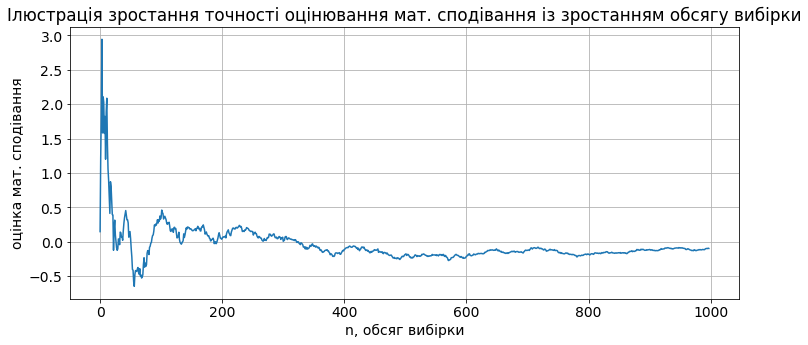

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
ax.plot(cons_m[2:n])
ax.set(xlabel='n, обсяг вибірки', ylabel='оцінка мат. сподівання',
       title='Ілюстрація зростання точності оцінювання мат. сподівання із зростанням обсягу вибірки')
ax.grid()
plt.show()
